In [1]:
!pip install matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SAB.csv to SAB.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [6]:
df = pd.read_csv('SAB.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df


,Price
0,242000
1,242000
2,243500
3,243900
4,241100
...,...
1263,56900
1264,56900
1265,57200
1266,57200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1268 non-null   int64
dtypes: int64(1)
memory usage: 10.0 KB


<h1> # Split the data into training, testing, and validation sets (7:2:1)

In [8]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [9]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [12]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [13]:
#  Create index for next 30 days
last_index = df.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']
next_30_days_features = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30 days
next_30_days_predictions = model.predict(next_30_days_features.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_df = pd.DataFrame(next_30_days_predictions, index=next_30_days_index, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1267        183846.38
1268        183846.38
1269        183846.38
1270        183846.38
1271        183846.38
1272        183846.38
1273        183846.38
1274        183846.38
1275        183846.38
1276        183846.38
1277        183846.38
1278        183846.38
1279        183846.38
1280        183846.38
1281        183846.38
1282        183846.38
1283        183846.38
1284        183846.38
1285        183846.38
1286        183846.38
1287        183846.38
1288        183846.38
1289        183846.38
1290        183846.38
1291        183846.38
1292        183846.38
1293        183846.38
1294        183846.38
1295        183846.38
1296        183846.38


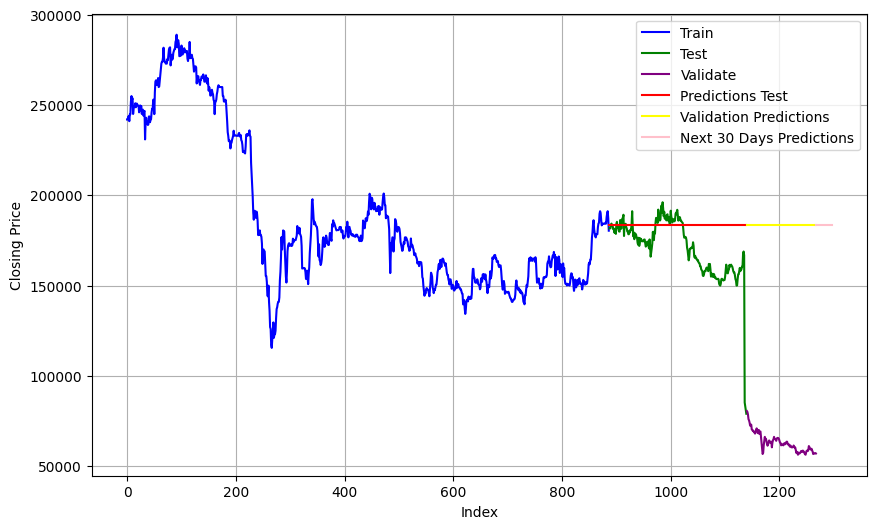

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_df.index, predicted_df['Predicted Close'], color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 120851.62026599768
Testing RMSE: 21196.719905132803
Validation MAE: 120738.56749999996
Testing MAE: 14774.026640316206
Validation MAPE: 193.18791396361624
Testing MAPE: 10.074995029877245


<h1> # Split the data into training, testing, and validation sets (6:3:1)

In [16]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [17]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [21]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [22]:
#  Create index for next 30 days
last_index = df.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']
next_30_days_features = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30 days
next_30_days_predictions = model.predict(next_30_days_features.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_df = pd.DataFrame(next_30_days_predictions, index=next_30_days_index, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1267        151326.78
1268        151326.78
1269        151326.78
1270        151326.78
1271        151326.78
1272        151326.78
1273        151326.78
1274        151326.78
1275        151326.78
1276        151326.78
1277        151326.78
1278        151326.78
1279        151326.78
1280        151326.78
1281        151326.78
1282        151326.78
1283        151326.78
1284        151326.78
1285        151326.78
1286        151326.78
1287        151326.78
1288        151326.78
1289        151326.78
1290        151326.78
1291        151326.78
1292        151326.78
1293        151326.78
1294        151326.78
1295        151326.78
1296        151326.78


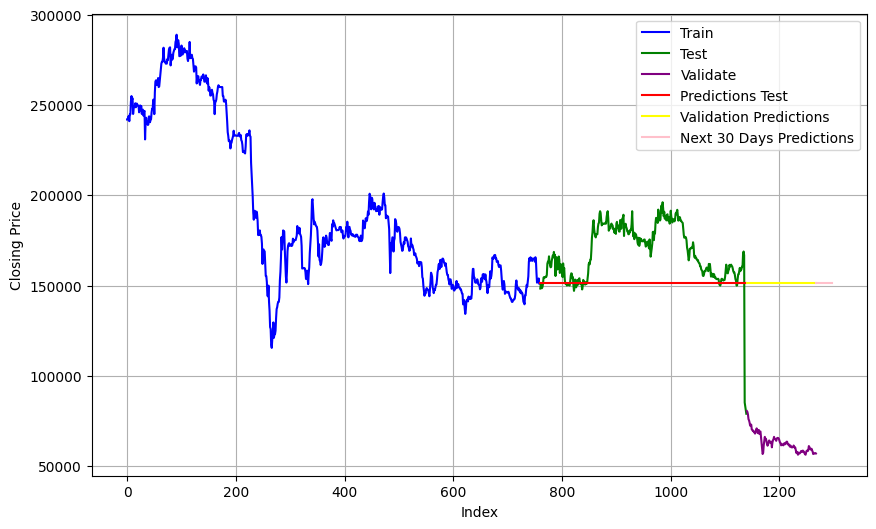

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_df.index, predicted_df['Predicted Close'], color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 88373.63105435295
Testing RMSE: 23468.817200267204
Validation MAE: 88218.96750000001
Testing MAE: 18718.243263157892
Validation MAPE: 141.32747653247827
Testing MAPE: 10.968341255424773


<h1> # Split the data into training, testing, and validation sets (5:3:2)

In [25]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [26]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [27]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [29]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [30]:
#  Create index for next 30 days
last_index = df.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']
next_30_days_features = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30 days
next_30_days_predictions = model.predict(next_30_days_features.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_df = pd.DataFrame(next_30_days_predictions, index=next_30_days_index, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1267        143047.84
1268        143047.84
1269        143047.84
1270        143047.84
1271        143047.84
1272        143047.84
1273        143047.84
1274        143047.84
1275        143047.84
1276        143047.84
1277        143047.84
1278        143047.84
1279        143047.84
1280        143047.84
1281        143047.84
1282        143047.84
1283        143047.84
1284        143047.84
1285        143047.84
1286        143047.84
1287        143047.84
1288        143047.84
1289        143047.84
1290        143047.84
1291        143047.84
1292        143047.84
1293        143047.84
1294        143047.84
1295        143047.84
1296        143047.84


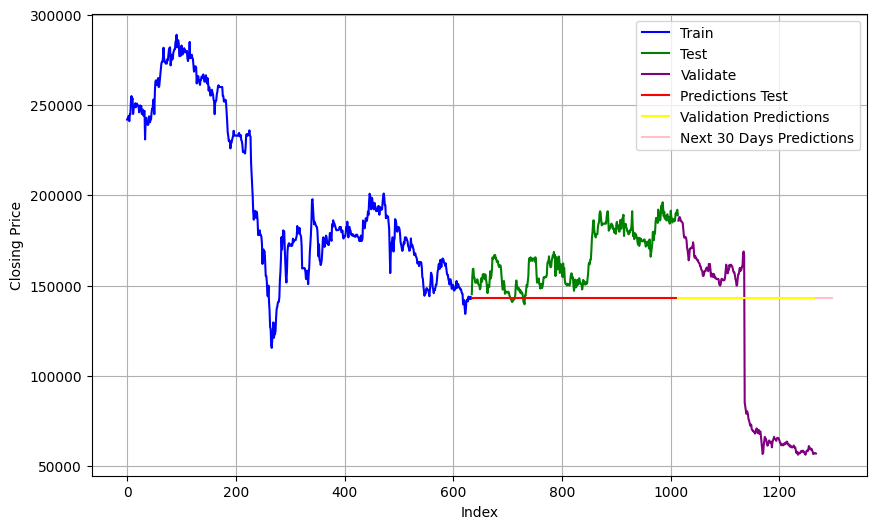

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_df.index, predicted_df['Predicted Close'], color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 59307.15083045408
Testing RMSE: 27644.093400445374
Validation MAE: 50570.38740157479
Testing MAE: 23137.08147368422
Validation MAPE: 71.34361558500383
Testing MAPE: 13.213162707244699
